In [249]:
import numpy as np
import scipy as sp
from scipy import special

##
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 4)
##

In [250]:
def is_even(x):
    return x % 2 == 0

In [251]:
def logbinomial(a, b):
    return sp.special.gammaln(a + 1) - sp.special.gammaln(b + 1) - sp.special.gammaln(a - b + 1)

In [252]:
a = 0
def pdf_beta(p, s, f):
    return np.exp((s - 1 + a) * np.log(p) + (f - 1 + a) * np.log(1 - p) - sp.special.betaln(s + a, f + a))

In [253]:
def log_hyper_2F1_below_1(a1, a2, b1, b2, w):
    log_results_even = []
    log_results_odd = []
    for n in range(int(b1+a)):
        log_resu = logbinomial(b1 - 1 +a, n) + sp.special.gammaln(a1 + a2 + n +2*a) + sp.special.gammaln(a1 + a2 + b2 + 3*a) - sp.special.gammaln(a1 + a2 + b2 + n + 3*a) - sp.special.gammaln(a1 + a2 + 2*a) + n * np.log(w)
        if is_even(n):
            log_results_even.append(log_resu)
        else:
            log_results_odd.append(log_resu)
    if len(log_results_odd) == 0:
        log_results_odd_partsum = -np.inf
    else:
        log_results_odd_partsum = sp.special.logsumexp(log_results_odd)
    if len(log_results_even) == 0:
        log_results_even_partsum = -np.inf
    else:
        log_results_even_partsum = sp.special.logsumexp(log_results_even)
    log_result = sp.special.logsumexp([log_results_even_partsum, log_results_odd_partsum], b=[1,-1])
    return log_result

def log_hyper_2F1_above_1(a1, a2, b1, b2, w):
    log_results_even = []
    log_results_odd = []
    for n in range(int(b2+a)):
        log_resu = logbinomial(b2 - 1 +a, n) + sp.special.gammaln(a1 + a2 + n + 2*a) + sp.special.gammaln(a1 + a2 + b1 + 3*a) - sp.special.gammaln(a1 + a2 + b1 + n + 3*a) - sp.special.gammaln(a1 + a2 + 2*a) - n * np.log(w)
        if is_even(n):
            log_results_even.append(log_resu)
        else:
            log_results_odd.append(log_resu)
    if len(log_results_odd) == 0:
        log_results_odd_partsum = -np.inf
    else:
        log_results_odd_partsum = sp.special.logsumexp(log_results_odd)
    if len(log_results_even) == 0:
        log_results_even_partsum = -np.inf
    else:
        log_results_even_partsum = sp.special.logsumexp(log_results_even)
    log_result = sp.special.logsumexp([log_results_even_partsum, log_results_odd_partsum], b=[1,-1])
    return log_result

In [254]:
def pdf_bb_ratio(a1, a2, b1, b2, w):
    lnA = sp.special.betaln(a1, b1) + sp.special.betaln(a2, b2)
    def pdf_calc(wi):
        if wi < 0:
            print('Ratio below Zero! Not reasonable!')
            exit(1)
        elif wi == 0:
            resulti = 0
        elif wi < 1:
            resulti = np.exp(sp.special.betaln(a1 + a2, b2) + (a1 - 1) * np.log(wi) + log_hyper_2F1_below_1(a1, a2, b1, b2, wi) - lnA)
        else:
            resulti = np.exp(sp.special.betaln(a1 + a2, b1) - (1 + a2) * np.log(wi) + log_hyper_2F1_above_1(a1, a2, b1, b2, wi) - lnA)
        return resulti
    if isinstance(w, int) or isinstance(w, float):
        result = pdf_calc(w)
    else:
        result = np.zeros(len(w))
        for i in range(len(w)):
            wi = w[i]
            result[i] = pdf_calc(wi)
    return result

In [255]:
def log_hyper_3F2_below_1(a1, a2, b1, b2, w):
    log_results_even = []
    log_results_odd = []
    for n in range(int(b1)):
        log_resu = logbinomial(b1 - 1, n) + sp.special.gammaln(a1 + n) + sp.special.gammaln(a1 + a2 + n) + sp.special.gammaln(a1 + 1) + sp.special.gammaln(a1 + a2 + b2) - sp.special.gammaln(a1) - sp.special.gammaln(a1 + a2) - sp.special.gammaln(a1 + n + 1) - sp.special.gammaln(a1 + a2 + b2 + n) + n * np.log(w)
        if is_even(n):
            log_results_even.append(log_resu)
        else:
            log_results_odd.append(log_resu)
    if len(log_results_odd) == 0:
        log_results_odd_partsum = -np.inf
    else:
        log_results_odd_partsum = sp.special.logsumexp(log_results_odd)
    if len(log_results_even) == 0:
        log_results_even_partsum = -np.inf
    else:
        log_results_even_partsum = sp.special.logsumexp(log_results_even)
    log_result = sp.special.logsumexp([log_results_even_partsum, log_results_odd_partsum], b = [1, -1])
    return log_result

def log_hyper_3F2_above_1(a1, a2, b1, b2, w):
    log_results_even = []
    log_results_odd = []
    for n in range(int(b2)):
        log_resu = logbinomial(b2 - 1, n) + sp.special.gammaln(a2 + n) + sp.special.gammaln(a1 + a2 + n) + sp.special.gammaln(a2 + 1) + sp.special.gammaln(a1 + a2 + b1) - sp.special.gammaln(a2) - sp.special.gammaln(a1 + a2) - sp.special.gammaln(a2 + n + 1) - sp.special.gammaln(a1 + a2 + b1 + n) - n * np.log(w)
        if is_even(n):
            log_results_even.append(log_resu)
        else:
            log_results_odd.append(log_resu)
    if len(log_results_odd) == 0:
        log_results_odd_partsum = -np.inf
    else:
        log_results_odd_partsum = sp.special.logsumexp(log_results_odd)
    if len(log_results_even) == 0:
        log_results_even_partsum = -np.inf
    else:
        log_results_even_partsum = sp.special.logsumexp(log_results_even)
    log_result = sp.special.logsumexp([log_results_even_partsum, log_results_odd_partsum], b = [1, -1])
    return log_result

In [256]:
def cdf_bb_ratio(a1, a2, b1, b2, w):
    lnA = sp.special.betaln(a1, b1) + sp.special.betaln(a2, b2)
    def cum_pdf_calc(wi):
        if wi < 0:
            print('Ratio below Zero! Not reasonable!')
            exit(1)
        elif wi == 0:
            resulti = 0
        elif wi < 1:
            resulti = np.exp(sp.special.betaln(a1 + a2, b2) + a1 * np.log(wi) - np.log(a1) + log_hyper_3F2_below_1(a1, a2, b1, b2, wi) - lnA)
        else:
            resulti = 1 - np.exp(sp.special.betaln(a1 + a2, b1) - a2 * np.log(wi) - np.log(a2) + log_hyper_3F2_above_1(a1, a2, b1, b2, wi) - lnA)
        return resulti
    if isinstance(w, int) or isinstance(w, float):
        result = cum_pdf_calc(w)
    else:
        result = np.zeros(len(w))
        for i in range(len(w)):
            wi = w[i]
            result[i] = cum_pdf_calc(wi)
    return result

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


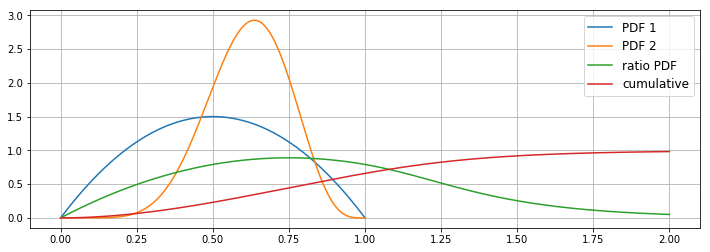

In [262]:
v = np.linspace(0,2,2001)
a1 = 2
b1 = 2
a2 = 8
b2 = 5
pdf1 = pdf_beta(v, a1, b1)
pdf2 = pdf_beta(v, a2, b2)
ratio_pdf = pdf_bb_ratio(a1, a2, b1, b2, v)
ratio_cdf = cdf_bb_ratio(a1, a2, b1, b2, v)
plt.plot(v, pdf1, label = 'PDF 1')
plt.plot(v, pdf2, label = 'PDF 2')
plt.plot(v, ratio_pdf, label = 'ratio PDF')
plt.plot(v, ratio_cdf, label = 'cumulative')

#expextation_value = VERGLEICHE RECHNUNG AUF BLATT IN BÜRO!

plt.grid(True)
plt.legend(loc = 'best', fontsize = 'large')
plt.show()